In [169]:
import pandas as pd # to perform data load
import numpy as np # to perform arithmatic operations
from matplotlib import pyplot as plt

In [170]:
data=pd.read_csv('HR_comma_sep.csv')

In [171]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [172]:
data.shape

(14999, 10)

In [173]:
left=data[data.left==1]
left.shape

(3571, 10)

In [174]:
left=data[data.left==0]
left.shape

(11428, 10)

<AxesSubplot:xlabel='salary'>

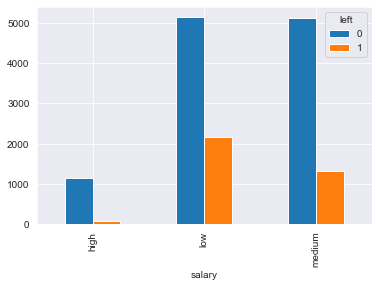

In [175]:
pd.crosstab(data.salary,data.left).plot(kind='bar')


<AxesSubplot:xlabel='Department'>

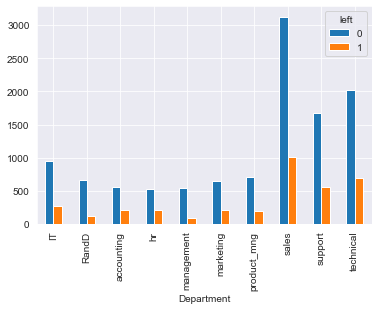

In [176]:
pd.crosstab(data.Department,data.left).plot(kind='bar')


In [177]:
#dummy_data=pd.get_dummies(data.salary,prefix='salary')
dummy_data=pd.get_dummies(data,columns=['salary'])
dummy_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,0,1,0


In [178]:
X=dummy_data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high','salary_low','salary_medium']]
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [179]:
y=dummy_data['left']

In [180]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [206]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [199]:
model.fit(X_train, y_train)


LogisticRegression()

In [201]:
model.predict(X_test)


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [202]:
model.predict_proba(X_test)

array([[0.37105765, 0.62894235],
       [0.8701026 , 0.1298974 ],
       [0.77627283, 0.22372717],
       ...,
       [0.58277472, 0.41722528],
       [0.7631163 , 0.2368837 ],
       [0.63456361, 0.36543639]])

In [203]:
model.score(X_test,y_test)


0.7766666666666666

In [205]:
reg.predict([[0.78,357,0,1,1,0]])


array([0.15721572])

In [ ]:
from sklearn import linear_model
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()

reg = linear_model.LinearRegression()
reg.fit(X,data['left'])